In [217]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!sh run.sh > /dev/null 2>&1
!head -n 30 name_logs.log

In [ ]:
df = pd.read_csv('./network.csv',index_col=0).fillna(0).astype(int)
df['degree'] = df.sum(axis=1)

df = df[df['degree'] > 0]

average_mutuals = df['degree'].mean()

print(df['degree'].sort_values()[450:])

In [ ]:
df[df['degree'] <= 1]

In [221]:
print(average_mutuals.round(1))

42.1


In [ ]:
df[df['degree'] > 0]['degree'].value_counts()[:20]

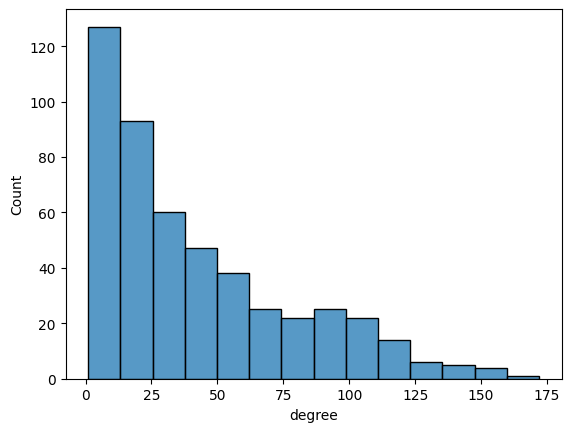

In [223]:
sns.histplot(df[df['degree'] > 0]['degree'])
# sns.histplot(df['degree'])

plt.show()

In [224]:
import networkx as nx
import pandas as pd

network = pd.read_csv('./network.csv',index_col=0)
g_disconnected = nx.from_pandas_adjacency(network)
# g_disconnected = g_disconnected.to_undirected(True)
g = g_disconnected.copy()
excluded_nodes = [node for node in g_disconnected.nodes() if g_disconnected.degree(node) == 0]
g.remove_nodes_from(excluded_nodes)

print(f"{len(g.nodes)=}, {len(g.edges)=}")

len(g.nodes)=488, len(g.edges)=10282


In [225]:
np.mean(list(nx.eccentricity(g).values()))

5.116803278688525

In [226]:
import networkx as nx

# Assuming your graph variable is named 'g'
eigenvalues = nx.linalg.spectrum.adjacency_spectrum(g)
L = nx.laplacian_matrix(g).toarray()
eigenvalues = np.linalg.eigvals(L)
sorted_eigenvalues = np.sort(eigenvalues)
print("Eigenvalues of the Laplacian matrix:", sorted_eigenvalues)
# print(eigenvalues)


Eigenvalues of the Laplacian matrix: [  0.           0.19621205   0.40768922   0.6139625    0.72684739
   0.7577696    0.88810398   0.93359609   0.95507694   0.97140031
   0.97380449   0.97633615   0.9796876    0.98822079   0.9974543
   1.02789506   1.21172701   1.40559918   1.44520295   1.63513253
   1.77439371   1.82663524   1.94059987   1.9440892    1.9799596
   2.00319963   2.05826474   2.23215534   2.42111787   2.45584933
   2.63255387   2.74627444   2.84458166   2.94625152   2.95627818
   2.974158     3.15228584   3.33937389   3.34384403   3.34657342
   3.37342811   3.59916415   3.76433936   3.87216928   3.88822108
   3.92977599   4.           4.           4.00914488   4.30989398
   4.72181804   4.8060922    4.88510227   4.94843183   4.97986458
   5.1589012    5.16951846   5.6950944    5.74906085   5.76127593
   5.82241516   5.90344956   6.26350871   6.32168594   6.42394467
   6.42941885   6.53701343   6.69418486   6.7477682    6.80477126
   6.85650445   6.87137204   6.99472978  

# Furthest *k* people

In [227]:
floyd_marsh = nx.floyd_warshall_numpy(g, nodelist=sorted(g.nodes()))
floyd_marsh

array([[0., 1., 2., ..., 1., 2., 2.],
       [1., 0., 2., ..., 2., 2., 2.],
       [2., 2., 0., ..., 2., 2., 2.],
       ...,
       [1., 2., 2., ..., 0., 1., 2.],
       [2., 2., 2., ..., 1., 0., 1.],
       [2., 2., 2., ..., 2., 1., 0.]])

In [228]:
k = 10


In [229]:
nx.algebraicconnectivity.algebraic_connectivity(g)

0.19621205362143343

In [230]:
max_clique = nx.approximation.max_clique(g)
len(max_clique)

26

In [ ]:
max_clique

Text(0.5, 1.0, 'Distribution of the length of shortest path between every two nodes')

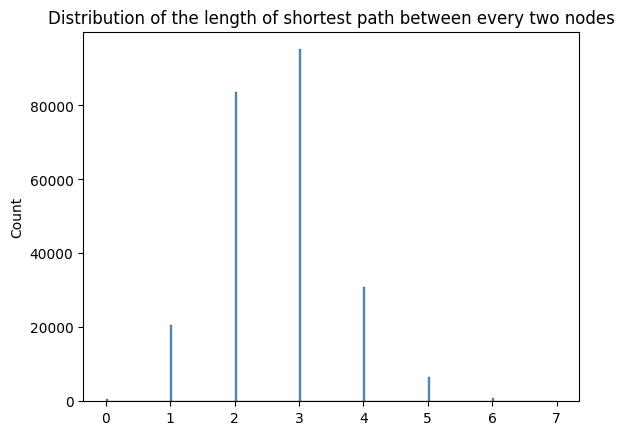

In [232]:
shp = nx.all_pairs_shortest_path_length(g)
shortest_paths_length = []

# for i in shp:
#     print(i)

for u in shp:
    shortest_paths_length.extend(u[1].values())

sns.histplot(shortest_paths_length).set_title('Distribution of the length of shortest path between every two nodes')

In [233]:
average_shortest_paths = nx.average_shortest_path_length(g)
print(f"Average shortest paths (excluding individual nodes): {average_shortest_paths}")

print(f"Diameter = {nx.diameter(g)}")


Average shortest paths (excluding individual nodes): 2.6718450196923285
Diameter = 7


In [234]:
len(nx.dominating_set(g))

102

In [235]:
# print(nx.node_boundary(g))

In [236]:
# import numpy as np

# clusterins = nx.clustering(g) # how the neighbos of a node, connect with each other
# np.average(list(clusterins.values()))

In [237]:
nx.node_connectivity(g)

1

In [238]:
clusters = pd.read_csv('./Clusters.csv', index_col='Name')

In [239]:
[i for i in range(clusters['Class'].max()+1)]
clusters['Class'].value_counts()

Class
0    127
2    102
6     93
3     75
1     53
4     32
5      6
Name: count, dtype: int64

In [ ]:
neigh_stats = pd.DataFrame(index=df.index)

for n in neigh_stats.index:
    for c in range(clusters['Class'].max()+1):
        try:
           neigh_stats.at[n,c] = max(1, sum([1 for i in g.neighbors(n) if clusters.loc[i].values[0]==c]))
        except Exception as e:
           pass

neigh_stats['126'] = neigh_stats[1]+neigh_stats[2]+neigh_stats[6]
neigh_stats['Extroversion'] = neigh_stats[0]*neigh_stats[1]*neigh_stats[2]*neigh_stats[3]*neigh_stats[4]*neigh_stats[5]*neigh_stats[6]
neigh_stats['Extroversion'] = neigh_stats[0]*neigh_stats['126']*neigh_stats[4]*neigh_stats[5]*neigh_stats[3]

neigh_stats.fillna(1, inplace=True)
neigh_stats.sort_values('Extroversion', ascending=False)[:20]

In [262]:
# sns.histplot(neigh_stats['Extroversion'], bins=20, stat='probability').set_title('Distribution of the extroversion of the nodes')

In [242]:
# sns.scatterplot(x=neigh_stats['123'], y=neigh_stats['Extroversion'], alpha=0.5)
# sns.scatterplot(x=neigh_stats[5], y=neigh_stats['Extroversion'], alpha=0.5)
# sns.scatterplot(x=neigh_stats[4], y=neigh_stats['Extroversion'], alpha=0.5)
# sns.scatterplot(x=neigh_stats[0], y=neigh_stats['Extroversion'], alpha=0.5)
# plt.legend(['123', '5', '4','0'])

In [263]:
# sns.histplot(neigh_stats[0], bins=20)
# sns.histplot(neigh_stats['123'], bins=20)
# sns.histplot(neigh_stats[4], bins=20)
# sns.histplot(neigh_stats[5], bins=20)
# plt.legend(['123', '5', '4','0'])

In [244]:
# bad performance
# k = 15  # Replace with your desired value of k
# k_cliques = list(nx.community.k_clique_communities(g, k))

In [ ]:
betweenness = nx.edge_betweenness_centrality(g)
max(betweenness.values())

betweenness_per_cluster = {}

for c in range(clusters['Class'].max()+1):
    cluster_nodes = clusters[clusters['Class'] == c].index
    subgraph = g.subgraph(cluster_nodes)
    betweenness = nx.betweenness_centrality(subgraph)
    betweenness_per_cluster[c] = betweenness

for k in betweenness_per_cluster.keys():
    max_betweenness = max(betweenness_per_cluster[k].values())
    max_betweenness_node = [node for node, value in betweenness_per_cluster[k].items() if value == max_betweenness]
    print(f"Max betweenness for cluster {k} = {max_betweenness} for node {max_betweenness_node}")

print()
print('Max betweenness for the whole network: ')
betweenness = nx.betweenness_centrality(g)
sorted_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)

for i in sorted_betweenness[:6]:
    print(i)    

<AxesSubplot: ylabel='Count'>

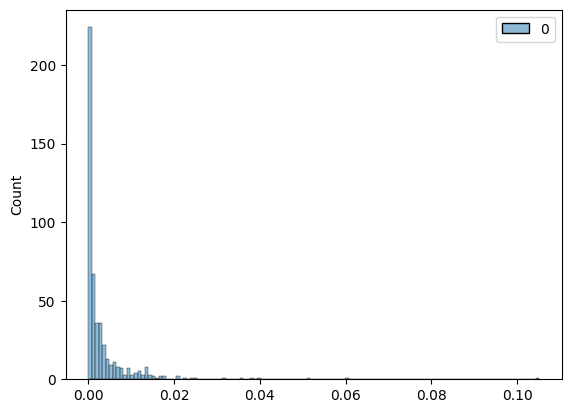

In [246]:
sns.histplot(betweenness.values())

In [247]:
closeness_centrality = nx.closeness_centrality(g)

# Compare the ranking of Extroversion and Betweenness

In [267]:
# comapre the ranking of extroversion and betweennness
neigh_stats['Betweenness'] = 0
neigh_stats['Closeness'] = 0

for k in betweenness.keys():
    neigh_stats.at[k,'Betweenness'] = betweenness[k]
    neigh_stats.at[k,'Closeness'] = closeness_centrality[k]

In [ ]:
# print the first 10 nodes with the highest betweenness and extroversion and compare them
print(neigh_stats.sort_values('Extroversion', ascending=False)[:20][['Extroversion']])

In [ ]:
print(neigh_stats.sort_values('Betweenness', ascending=False)[:20][['Betweenness']])

In [ ]:
print(neigh_stats.sort_values('Closeness', ascending=False)[:20][['Closeness']])

In [271]:
# sns.histplot(neigh_stats['Betweenness'], bins=20, alpha=0.5)
# plt.show()
# sns.histplot(neigh_stats['Extroversion'], bins=20, alpha=0.5)
# plt.show()
# sns.histplot(neigh_stats['Closeness'], bins=20, alpha=0.5)
# plt.show()
# sns.scatterplot(x=neigh_stats['Betweenness'], y=neigh_stats['Extroversion'], alpha=0.5)
# plt.show()


In [272]:

for k in [3, 5, 10, 20
          , 50, 100, 200, 300]:
    list1 = neigh_stats['Betweenness'].sort_values(ascending=False).index
    list2 = neigh_stats['Extroversion'].sort_values(ascending=False).index
            
    # Extract the first k elements
    top_k_list1 = set(list1[:k])
    top_k_list2 = set(list2[:k])

    # print(top_k_list1, top_k_list2)
    # Calculate the intersection of the two sets
    common_elements = top_k_list1.intersection(top_k_list2)

    # Precision: proportion of selected items that are relevant
    if len(top_k_list1) == 0:
        precision = 0
    else:
        precision = len(common_elements) / len(top_k_list2)

    # Recall: proportion of relevant items that are selected
    if len(top_k_list2) == 0:
        recall = 0
    else:
        recall = len(common_elements) / len(top_k_list1)

    print(f'precision@{k}= {precision}, recall@{k}= {recall}')  

precision@3= 0.6666666666666666, recall@3= 0.6666666666666666
precision@5= 0.6, recall@5= 0.6
precision@10= 0.7, recall@10= 0.7
precision@20= 0.55, recall@20= 0.55
precision@50= 0.6, recall@50= 0.6
precision@100= 0.67, recall@100= 0.67
precision@200= 0.74, recall@200= 0.74
precision@300= 0.822742474916388, recall@300= 0.822742474916388


<AxesSubplot: >

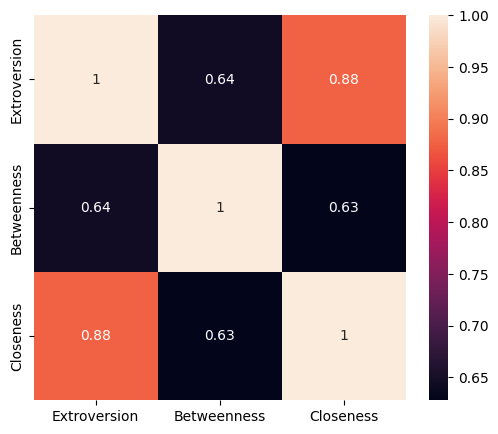

In [254]:
spearman_corr = neigh_stats[['Extroversion', 'Betweenness', 'Closeness']].corr(method='spearman')

plt.figure(figsize=(6, 5))
sns.heatmap(spearman_corr, annot=True)

In [ ]:
neigh_stats

<AxesSubplot: >

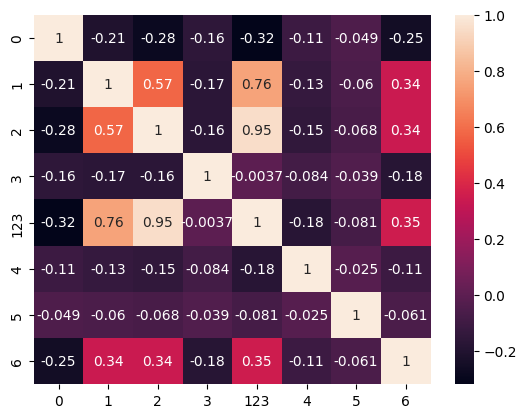

In [256]:
spear_all = neigh_stats[[0,1,2,3,'123',4,5,6]].corr(method='pearson')
sns.heatmap(spear_all, annot = True)

<AxesSubplot: >

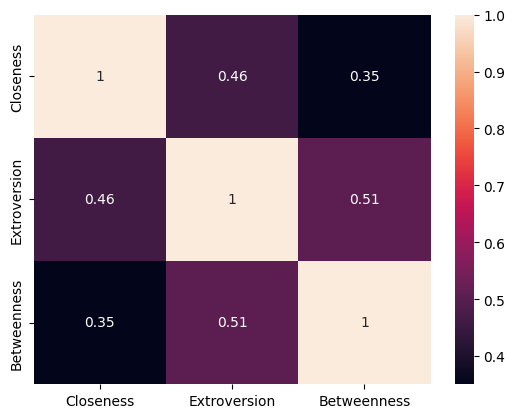

In [257]:
spear_all = neigh_stats[['Closeness','Extroversion','Betweenness']].corr(method='pearson')
sns.heatmap(spear_all, annot = True)

In [ ]:
precisions = []
recalls = []

for k in range(1, min(len(list1), len(list2)) + 1):
    top_k_list1 = set(list1[:k])
    top_k_list2 = set(list2[:k])
    common_items = top_k_list1.intersection(top_k_list2)
    
    precision = len(common_items) / len(top_k_list1) if top_k_list1 else 0
    recall = len(common_items) / len(top_k_list2) if top_k_list2 else 0
    
    precisions.append(precision)
    recalls.append(recall)
    
# plt.figure(figsize=(8, 4))
# plt.plot(range(1, len(precisions) + 1), precisions, label='Precision')
# plt.plot(range(1, len(recalls) + 1), recalls, label='Recall')
# plt.title('Precision and Recall vs. k')
# plt.xlabel('k')
# plt.ylabel('Value')
# plt.legend()
# plt.grid(True)
# plt.show()

# Derivative Graph

In [259]:
neigh_stats['Name'] = neigh_stats.index
dv = pd.merge(neigh_stats, clusters, on='Name')[[0,1,2,3,4,5,6,'Class']].copy()

derivative_graph = dv.groupby('Class').sum()

for i in range(7):
    for j in range(7):
        if derivative_graph.iloc[i,j] != derivative_graph.iloc[j,i]:
            derivative_graph.iloc[i,j] = max(derivative_graph.iloc[i,j], derivative_graph.iloc[j,i])
            derivative_graph.iloc[j,i] = max(derivative_graph.iloc[i,j], derivative_graph.iloc[j,i])

derivative_graph.to_csv('derivative_graph.csv')
derivative_graph

,0,1,2,3,4,5,6
Class,,,,,,,
0,3070.0,182.0,153.0,148.0,128.0,129.0,137.0
1,182.0,1609.0,1285.0,78.0,53.0,53.0,448.0
2,153.0,1285.0,6340.0,152.0,102.0,102.0,935.0
3,148.0,78.0,152.0,1108.0,75.0,75.0,103.0
4,128.0,53.0,102.0,75.0,448.0,32.0,111.0
5,129.0,53.0,102.0,75.0,32.0,18.0,93.0
6,137.0,448.0,935.0,103.0,111.0,93.0,2026.0


In [260]:
derivative_graph

,0,1,2,3,4,5,6
Class,,,,,,,
0,3070.0,182.0,153.0,148.0,128.0,129.0,137.0
1,182.0,1609.0,1285.0,78.0,53.0,53.0,448.0
2,153.0,1285.0,6340.0,152.0,102.0,102.0,935.0
3,148.0,78.0,152.0,1108.0,75.0,75.0,103.0
4,128.0,53.0,102.0,75.0,448.0,32.0,111.0
5,129.0,53.0,102.0,75.0,32.0,18.0,93.0
6,137.0,448.0,935.0,103.0,111.0,93.0,2026.0
